In [101]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [102]:
csv_file = Path("Resources/2015_Life_happiness_mergedupdate.csv")
life_happiness_df = pd.read_csv(csv_file)
life_happiness_df.head()

,Unnamed: 0,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,2,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [103]:
social_freedom_df = life_happiness_df[["Country", "continent", "happiness_score", "family", "freedom", "Life expectancy "]].copy()
social_freedom_df = social_freedom_df.dropna(how="any")
#social_freedom_df

social_freedom_df.to_csv("Resources/PB_support_freedom.csv", index=False, header=True)
social_freedom_df


,Country,continent,happiness_score,family,freedom,Life expectancy
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0
1,Albania,Europe,4.644,0.803685,0.381499,77.8
2,Algeria,Africa,5.872,1.146217,0.233336,75.6
5,Argentina,South America,6.599,1.440451,0.494519,76.3
6,Armenia,Asia,4.376,1.007484,0.198303,74.8
...,...,...,...,...,...,...
175,Uruguay,South America,6.454,1.412228,0.579392,77.0
176,Uzbekistan,Asia,5.971,1.548969,0.658249,69.4
180,Yemen,Asia,3.593,0.935382,0.249464,65.7
181,Zambia,Africa,4.514,1.003187,0.461603,61.8


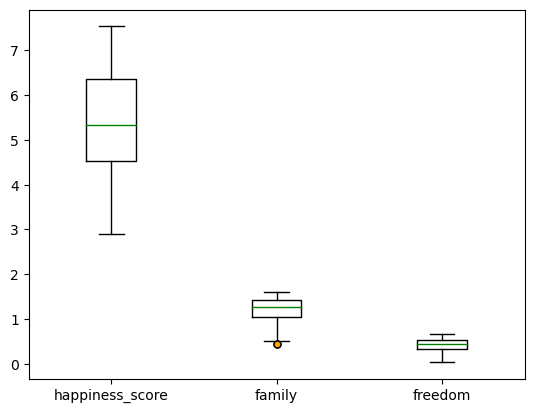

In [104]:
outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")

ax = social_freedom_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, whiskerprops=whiskers, capprops=caps)

plt.show()


In [105]:
continents = social_freedom_df["continent"].unique()
continent_list = [i for i in continents]
print(continent_list)

continent_results = []

['Asia', 'Europe', 'Africa', 'South America', 'Australia', 'North America']


Happiness Outliers for Asia: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Asia: 0     0.581543
61    0.570615
Name: family, dtype: float64
Freedom Outliers for Asia: 0    0.10618
Name: freedom, dtype: float64


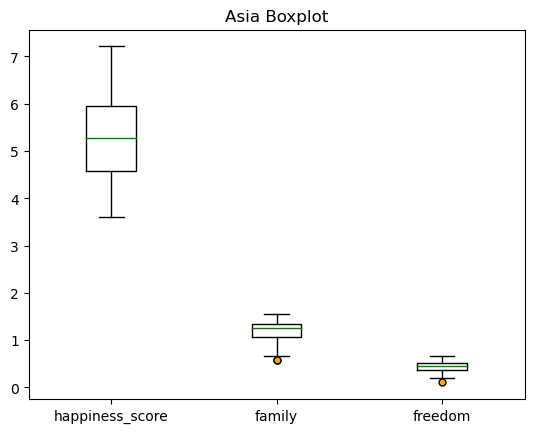

Happiness Outliers for Europe: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Europe: 1      0.803685
20     1.069336
40     0.967983
132    1.150091
Name: family, dtype: float64
Freedom Outliers for Europe: Series([], Name: freedom, dtype: float64)


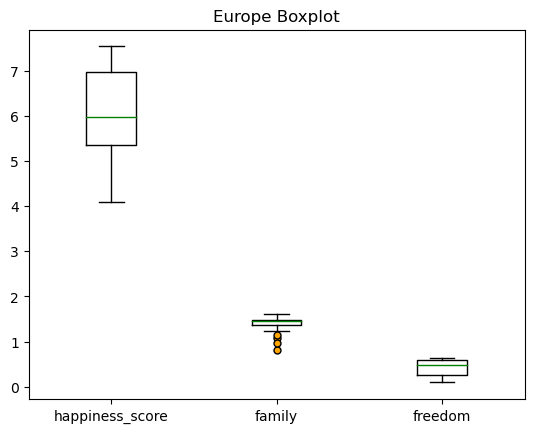

Happiness Outliers for Africa: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Africa: Series([], Name: family, dtype: float64)
Freedom Outliers for Africa: 26     0.059901
103    0.096098
Name: freedom, dtype: float64


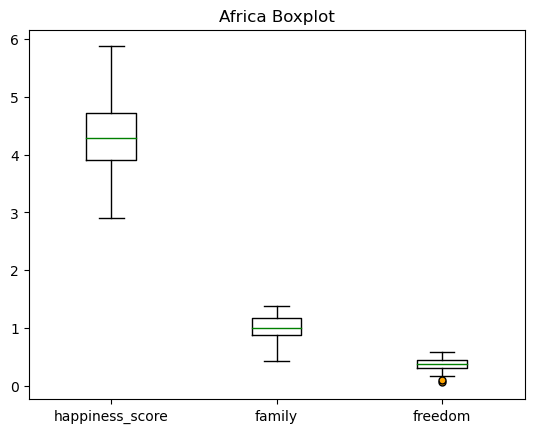

Happiness Outliers for South America: 67    3.507
70    3.603
Name: happiness_score, dtype: float64
Family Outliers for South America: 67    0.791245
70    0.640450
Name: family, dtype: float64
Freedom Outliers for South America: 70    0.03037
Name: freedom, dtype: float64


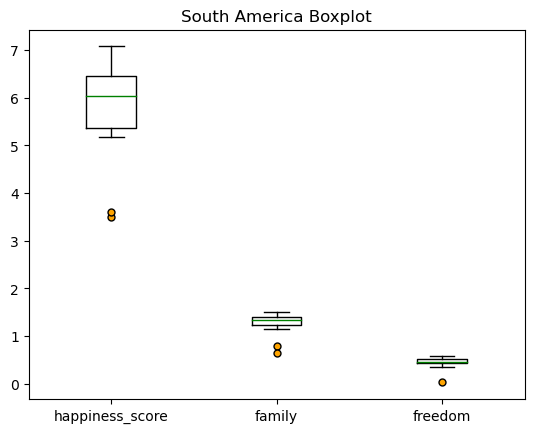

Happiness Outliers for Australia: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Australia: Series([], Name: family, dtype: float64)
Freedom Outliers for Australia: Series([], Name: freedom, dtype: float64)


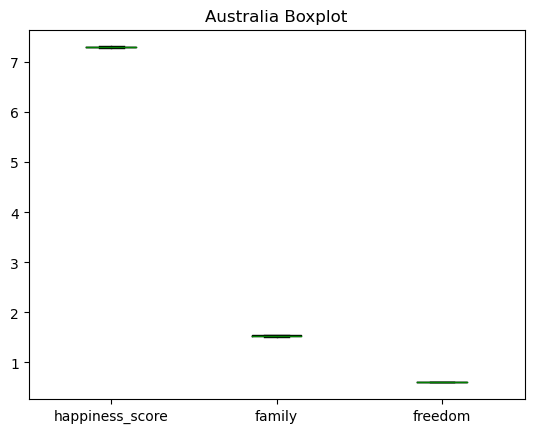

Happiness Outliers for North America: Series([], Name: happiness_score, dtype: float64)
Family Outliers for North America: Series([], Name: family, dtype: float64)
Freedom Outliers for North America: Series([], Name: freedom, dtype: float64)


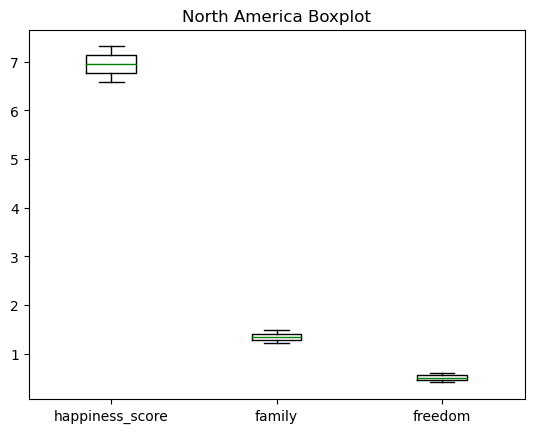

In [106]:

outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")

for x in continent_list:
    continent_df = social_freedom_df.loc[social_freedom_df["continent"] == x]
    ax = continent_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, 
                                                                         whiskerprops=whiskers, capprops=caps, title=(f'{x} Boxplot'))
    
    happy_subset = continent_df['happiness_score']
    happy_quartiles = happy_subset.quantile([0.25,0.5,0.75])
    happy_lowerq = happy_quartiles[0.25]
    happy_upperq = happy_quartiles[0.75]
    happy_iqr = happy_upperq - happy_lowerq
    happy_lower_bound = happy_lowerq - (1.5*happy_iqr)
    happy_upper_bound = happy_upperq + (1.5*happy_iqr)
    happy_outliers = (happy_subset.loc[(happy_subset < happy_lower_bound) | (happy_subset > happy_upper_bound)])
    print(f"Happiness Outliers for {x}: {happy_outliers}")
    
    family_subset = continent_df['family']
    family_quartiles = family_subset.quantile([0.25,0.5,0.75])
    family_lowerq = family_quartiles[0.25]
    family_upperq = family_quartiles[0.75]
    family_iqr = family_upperq - family_lowerq
    family_lower_bound = family_lowerq - (1.5*family_iqr)
    family_upper_bound = family_upperq + (1.5*family_iqr)
    family_outliers = (family_subset.loc[(family_subset < family_lower_bound) | (family_subset > family_upper_bound)])
    print(f"Family Outliers for {x}: {family_outliers}")

    freedom_subset = continent_df['freedom']
    freedom_quartiles = freedom_subset.quantile([0.25,0.5,0.75])
    freedom_lowerq = freedom_quartiles[0.25]
    freedom_upperq = freedom_quartiles[0.75]
    freedom_iqr = freedom_upperq - freedom_lowerq
    freedom_lower_bound = freedom_lowerq - (1.5*freedom_iqr)
    freedom_upper_bound = freedom_upperq + (1.5*freedom_iqr)
    freedom_outliers = (freedom_subset.loc[(freedom_subset < freedom_lower_bound) | (freedom_subset > freedom_upper_bound)])
    print(f"Freedom Outliers for {x}: {freedom_outliers}")

    plt.show()



In [107]:
social_freedom_df["% of Happiness from Support"] = (social_freedom_df["family"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df["% of Happiness from Freedom"] = (social_freedom_df["freedom"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df.head()

,Country,continent,happiness_score,family,freedom,Life expectancy,% of Happiness from Support,% of Happiness from Freedom
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0,15.327974,2.798617
1,Albania,Europe,4.644,0.803685,0.381499,77.8,17.305884,8.214871
2,Algeria,Africa,5.872,1.146217,0.233336,75.6,19.520051,3.973702
5,Argentina,South America,6.599,1.440451,0.494519,76.3,21.828325,7.493851
6,Armenia,Asia,4.376,1.007484,0.198303,74.8,23.022937,4.531610
